<a href="https://colab.research.google.com/github/shizoda/education/blob/main/image/colors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# デジタル画像

### RGB カラー画像

画素（ピクセル）、すなわち画像に含まれる個々の点は、赤 (Red)・緑 (Green)・青 (Blue)の３つの基本色の組み合わせで表現されることが多いです。各画素はこれらの色の組み合わせによって色が決まり、それぞれの色成分は 0 から 255 の範囲で表されます。例えば、[R, G, B] = [255, 0, 0] は赤色を示します。

<a title="No machine-readable author provided. Shlomital~commonswiki assumed (based on copyright claims)., CC BY-SA 3.0 &lt;http://creativecommons.org/licenses/by-sa/3.0/&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Additive_RGB_Circles-48bpp.png"><img width="256" alt="Additive RGB Circles-48bpp" src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3b/Additive_RGB_Circles-48bpp.png/512px-Additive_RGB_Circles-48bpp.png?20060827220308"></a>

３つの値で表される画素を格子状に並べることで画像をつくります。ここでは左上を原点とし、横軸を X 軸，縦軸を Y としてみましょう。この画像を３次元配列で表す場合、 次元は順に [X, Y, C] を表します。C は Channel の意味で、順に 0=R, 1=G, 2=B とします。<br>
※ このあたりの決め方は必ずしも一般的ではありません。

### NumPy を用いた画像操作

NumPy は Python で数値計算を効率的に行うためのライブラリで、多次元配列を扱うことができます。RGB画像は3次元のNumPy配列として表現され、各次元はそれぞれ幅、高さ、色チャンネルを表します。

[NumPy の扱い自体を練習したい場合はこちら](https://github.com/shizoda/education/blob/main/machine_learning/numpy.ipynb)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show(image, figsize=(10, 5)):
    """
    画像を表示する関数

    Parameters:
    - image: 表示する画像のnumpy配列（RGB形式）
    - figsize: 表示する図のサイズ (デフォルトは横 10cm x 縦 5cm)
    """
    image_flipped = np.transpose(image, (1,0,2))
    plt.figure(figsize=figsize)
    plt.imshow(image_flipped, interpolation='none')
    plt.axis('off')  # 軸を非表示にする
    plt.show()

def create(x=20, y=10):
    """
    初期状態で指定サイズの空のRGB画像を生成する関数

    Parameters:
    - x: 画像の横幅
    - y: 画像の縦幅

    Returns:
    - image: 生成された空のRGB画像（numpy配列）
    """

    # パステルカラーのRGB値の範囲を定義
    low = 170
    high = 255

    return np.random.randint(low, high, (x, y, 3), dtype=np.uint8)

### 配列の書き換え

`create()` 関数により、RGB画像 `image` がランダムなパステルカラーで生成されます。これに対して、生成した画像の一部の画素の値を手動で書き換えて、いろいろな矩形や模様を生成してみましょう。

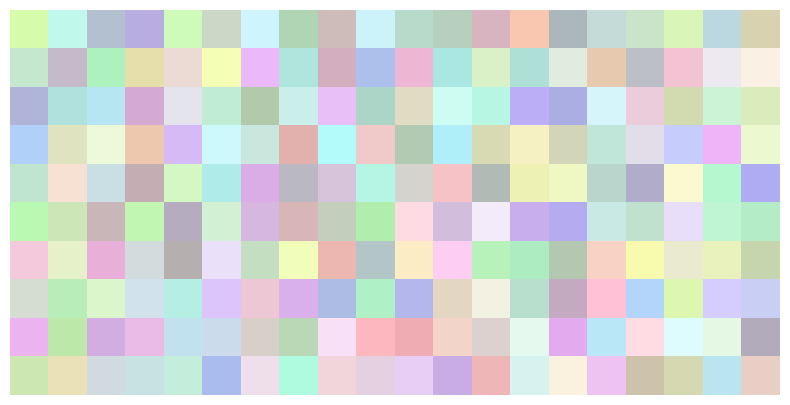

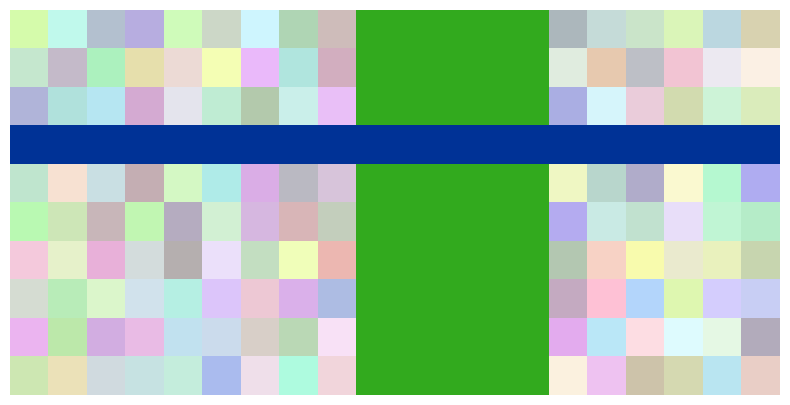

In [ ]:
image = create(x=20, y=10)
show(image)  # 表示サイズを指定して表示

#      X     Y     C       R    G    B
image[9:14,  :  ,  : ] = [ 50, 170,  30]
image[ :  ,  3  ,  : ] = [  0,  50, 150]

show(image)  # 表示サイズを指定して表示

### 課題１

左半分には F という文字が，いろいろな色で描かれています．
<br>これに加えて、右半分に何らかの文字または絵を描いてください．

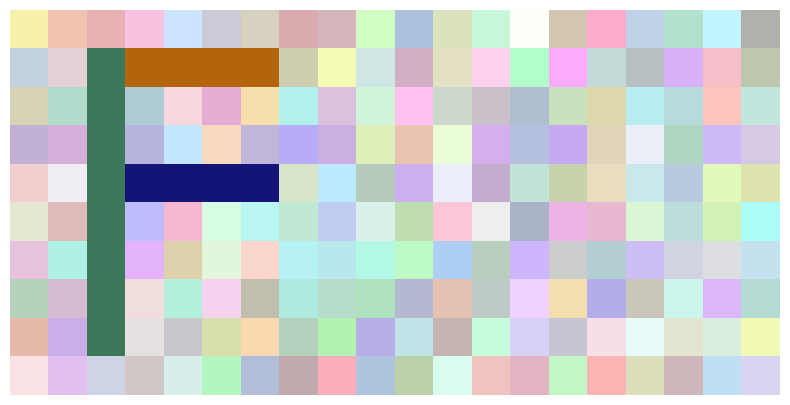

In [ ]:
image = create(x=20, y=10)

######## ↓書き換えここから↓ ########

#      X     Y   C       R    G     B
image[ 2 ,  1:9, : ]  = [ 60, 120,  90]
image[ 3:7, 1 ,  : ]  = [180, 100,  10]
image[ 3:7, 4 ,  : ]  = [ 20,  20, 120]


######## ↑書き換えここまで↑ ########

show(image)  # 表示サイズを指定して表示

### 課題２

元のパステルカラーの画像を、全体に暗い青に変えてみてください。

<img src="https://raw.githubusercontent.com/shizoda/education/main/image/dark_blue.png" width="300">

課題１のように色を３次元で決めず，特定のチャネルだけ設定しています。
すでに書かれているソースは「明るい赤」にするものですので、それを**書き換えて**「暗い青」にしてください。

`image[:, :, 0]` のようにすると R の値を一括変更できます。ここでは省略した書き方で `image[..., 0]` としています。

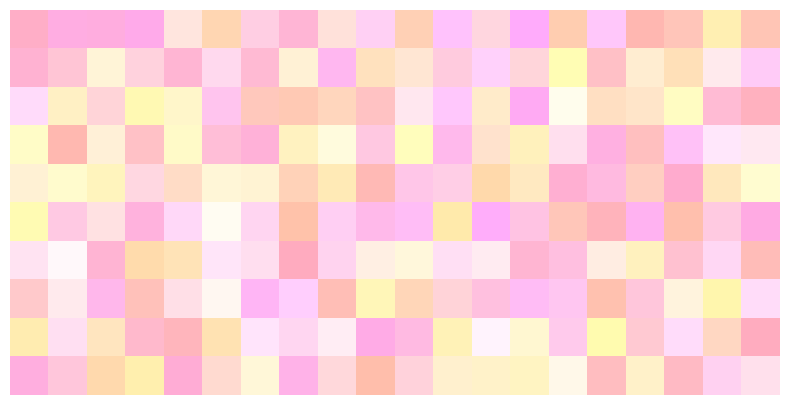

In [ ]:
image = create(x=20, y=10)

######## ↓書き換えここから↓ ########

# 明るい赤で表す例を示します
#     (X, Y),  C
image[   ... , 0 ] = 255

######## ↑書き換えここまで↑ ########

show(image)  # 表示サイズを指定して表示